In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model


model_path = '/content/drive/MyDrive/traffic_sign_model.keras'

model = load_model(model_path)

print("Model successfully loaded!")


Model successfully loaded!


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
!ls /content/drive/MyDrive/


 1721760441130.jpg	     'HABIBA_TANVEER CV.pdf'
 Classroom		     'mobile documentation t to t.docx'
'Colab Notebooks'	      Snapchat-756599088.jpg
 githhub		      traffic_sign_model.h5
'Habiba Tanveer CV (3).pdf'   traffic_sign_model.keras
'Habiba Tanveer CV.pdf'      'Untitled Diagram-Page-1.drawio.png'


In [ ]:
img_path = '/content/drive/MyDrive/1721760441130.jpg'


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(32, 32))  # apne model ke input size ke hisab se
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Prediction: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [1]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: habibatanveer20
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|██████████| 612M/612M [00:01<00:00, 341MB/s]

In [2]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Train CSV path
train_csv = pd.read_csv("/content/gtsrb-german-traffic-sign/Train.csv")

# Images & labels load
images, labels = [], []
for i, row in train_csv.iterrows():
    img = cv2.imread('/content/gtsrb-german-traffic-sign/' + row['Path'])
    img = cv2.resize(img, (30, 30))
    images.append(img)
    labels.append(row['ClassId'])

X = np.array(images).astype("float32") / 255.0
y = np.array(labels)
y = to_categorical(y, num_classes=43)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Test dataset ready!")


✅ Test dataset ready!


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import os
print(os.listdir("/content/drive/MyDrive"))


['Classroom', 'Colab Notebooks', 'Snapchat-756599088.jpg', 'HABIBA_TANVEER CV.pdf', '1721760441130.jpg', 'githhub', 'mobile documentation t to t.docx', 'Habiba Tanveer CV.pdf', 'Habiba Tanveer CV (3).pdf', 'Untitled Diagram-Page-1.drawio.png', 'traffic_sign_model.h5', 'traffic_sign_model.keras']


In [7]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/traffic_sign_model.h5")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


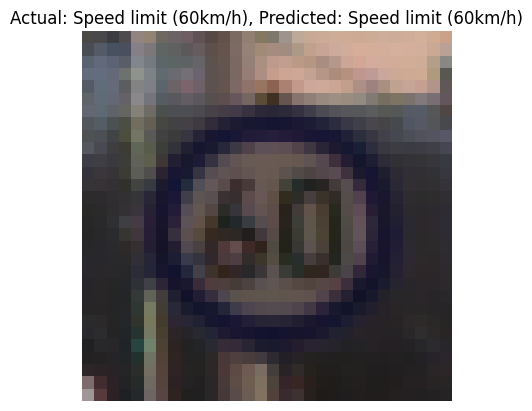

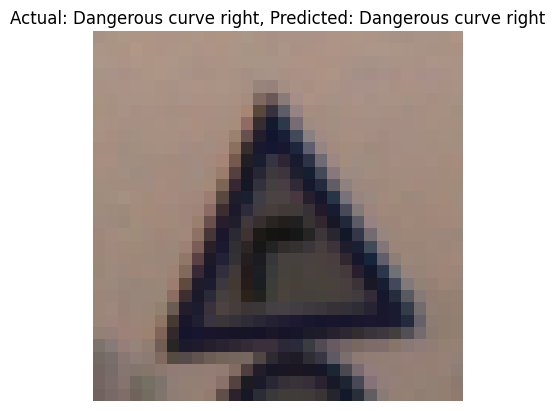

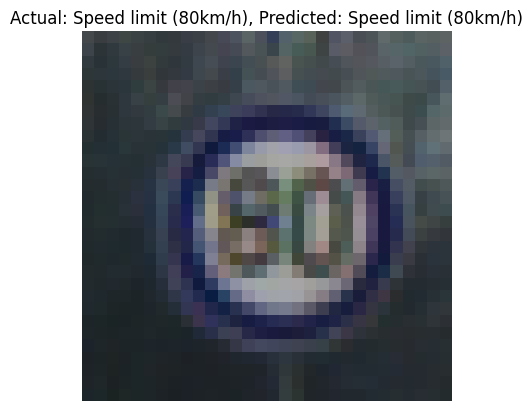

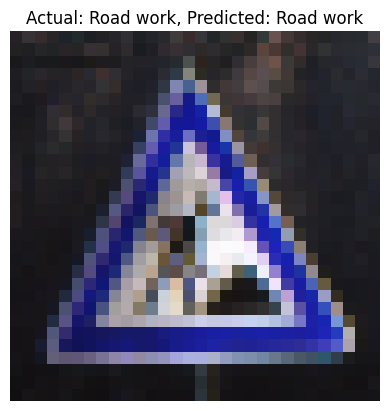

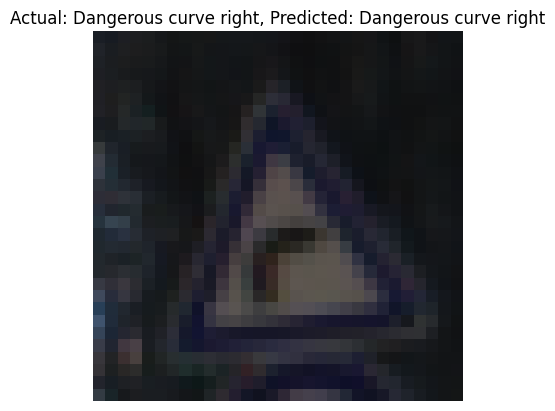

In [8]:
import random
import matplotlib.pyplot as plt

# ClassId to Name mapping
classes = {
   0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)",
   3: "Speed limit (60km/h)", 4: "Speed limit (70km/h)", 5: "Speed limit (80km/h)",
   6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)", 8: "Speed limit (120km/h)",
   9: "No passing", 10: "No passing for vehicles over 3.5 tons", 11: "Right-of-way at intersection",
   12: "Priority road", 13: "Yield", 14: "Stop", 15: "No vehicles", 16: "Vehicles over 3.5 tons prohibited",
   17: "No entry", 18: "General caution", 19: "Dangerous curve left", 20: "Dangerous curve right",
   21: "Double curve", 22: "Bumpy road", 23: "Slippery road", 24: "Road narrows on the right",
   25: "Road work", 26: "Traffic signals", 27: "Pedestrian crossing", 28: "Children crossing",
   29: "Bicycles crossing", 30: "Beware of ice/snow", 31: "Wild animals crossing",
   32: "End of all speed and passing limits", 33: "Turn right ahead", 34: "Turn left ahead",
   35: "Ahead only", 36: "Go straight or right", 37: "Go straight or left", 38: "Keep right",
   39: "Keep left", 40: "Roundabout mandatory", 41: "End of no passing",
   42: "End of no passing for vehicles over 3.5 tons"
}

# Prediction
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Show 5 random predictions
for i in range(5):
    idx = random.randint(0, len(X_test)-1)
    plt.imshow(X_test[idx])
    plt.title(f"Actual: {classes[y_true[idx]]}, Predicted: {classes[y_pred_classes[idx]]}")
    plt.axis('off')
    plt.show()


In [9]:
# ✅ Test accuracy check in one line
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"🎯 Test Accuracy: {acc:.4f}")



🎯 Test Accuracy: 0.9912


In [13]:
import json
with open('/content/drive/MyDrive/classes.json', 'w') as f:
    json.dump(classes, f)


In [14]:
import numpy as np
np.save('/content/drive/MyDrive/X_test.npy', X_test)
np.save('/content/drive/MyDrive/y_test.npy', y_test)


In [17]:
dataset_path = '/content/drive/MyDrive/your_dataset_folder/train'
